# Project1
## Momentum Trading
### MACD

In [44]:
# Initial imports
import os
import requests
import pandas as pd
import numpy as np
#from MCForecastTools import MCSimulation
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
#from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
import hvplot.pandas


%matplotlib inline

In [45]:
# Load .env enviroment variables
load_dotenv()

True

### Collect Investments Data Using Alpaca: `AAPLE` (stocks) 

In [46]:
# Set current amount of shares
my_apple = 1

In [47]:
# Set Alpaca API key and secret
alpaca_api_key=os.getenv('ALPACA_API_KEY')
alpaca_secret_key=os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
alpaca=tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2'
)

In [48]:
# Format current date as ISO format
start_time=pd.Timestamp('2023-10-22', tz='America/New_York').isoformat()
end_time=pd.Timestamp('2023-10-31', tz='America/New_York').isoformat()

# Set the tickers
tickers = ["AAPL"]

# Set timeframe to "1Minute" for Alpaca API
timeframe = "15Min"

# Get current closing prices for AAPL and SP500
df_tickers=alpaca.get_bars(
    tickers,
    timeframe,
    start=start_time,
    end=end_time
).df

df_tickers.head()

,close,high,low,trade_count,open,volume,vwap,symbol
timestamp,,,,,,,,
2023-10-23 08:00:00+00:00,172.05,172.60,171.68,736,172.60,32198,171.919792,AAPL
2023-10-23 08:15:00+00:00,171.75,172.01,171.75,310,172.01,22771,171.945607,AAPL
2023-10-23 08:30:00+00:00,171.86,171.86,171.70,141,171.76,9720,171.782001,AAPL
2023-10-23 08:45:00+00:00,171.70,171.82,171.70,62,171.82,3271,171.722443,AAPL
2023-10-23 09:00:00+00:00,170.46,171.67,170.00,1065,171.67,50372,170.773750,AAPL


In [49]:
# Reorganize the DataFrame
# Separate ticker data
df_tickers.drop(['high','low','trade_count','open','volume','vwap','symbol'], axis=1, inplace=True)

df_tickers.head()

,close
timestamp,
2023-10-23 08:00:00+00:00,172.05
2023-10-23 08:15:00+00:00,171.75
2023-10-23 08:30:00+00:00,171.86
2023-10-23 08:45:00+00:00,171.70
2023-10-23 09:00:00+00:00,170.46


### MACD formula

In [50]:
# Set MACD formula and iterate over Apple data for the specified intervals and period of time

moving_average_convergance_divergence_ema12 = df_tickers['close'].ewm(halflife=12).mean()
moving_average_convergance_divergence_ema26 = df_tickers['close'].ewm(halflife=26).mean()
  

In [51]:

MACD_line = moving_average_convergance_divergence_ema12 - moving_average_convergance_divergence_ema26
MACD_line.head()


timestamp
2023-10-23 08:00:00+00:00    0.000000
2023-10-23 08:15:00+00:00   -0.002332
2023-10-23 08:30:00+00:00   -0.001908
2023-10-23 08:45:00+00:00   -0.003604
2023-10-23 09:00:00+00:00   -0.020617
Name: close, dtype: float64

In [52]:
Signal_line = MACD_line.ewm(halflife=9).mean()
Signal_line.head()

timestamp
2023-10-23 08:00:00+00:00    0.000000
2023-10-23 08:15:00+00:00   -0.001211
2023-10-23 08:30:00+00:00   -0.001461
2023-10-23 08:45:00+00:00   -0.002060
2023-10-23 09:00:00+00:00   -0.006364
Name: close, dtype: float64

In [53]:
df_tickers=df_tickers.assign(ewm12=df_tickers['close'].ewm(halflife=12).mean())
df_tickers.head()

,close,ewm12
timestamp,,
2023-10-23 08:00:00+00:00,172.05,172.050000
2023-10-23 08:15:00+00:00,171.75,171.895669
2023-10-23 08:30:00+00:00,171.86,171.883086
2023-10-23 08:45:00+00:00,171.70,171.833276
2023-10-23 09:00:00+00:00,170.46,171.526012


In [54]:
df_tickers=df_tickers.assign(ewm26=df_tickers['close'].ewm(halflife=26).mean())
df_tickers.head()

,close,ewm12,ewm26
timestamp,,,
2023-10-23 08:00:00+00:00,172.05,172.050000,172.050000
2023-10-23 08:15:00+00:00,171.75,171.895669,171.898001
2023-10-23 08:30:00+00:00,171.86,171.883086,171.884995
2023-10-23 08:45:00+00:00,171.70,171.833276,171.836880
2023-10-23 09:00:00+00:00,170.46,171.526012,171.546629


In [55]:
df_tickers=df_tickers.assign(macd=MACD_line)
df_tickers.head()

,close,ewm12,ewm26,macd
timestamp,,,,
2023-10-23 08:00:00+00:00,172.05,172.050000,172.050000,0.000000
2023-10-23 08:15:00+00:00,171.75,171.895669,171.898001,-0.002332
2023-10-23 08:30:00+00:00,171.86,171.883086,171.884995,-0.001908
2023-10-23 08:45:00+00:00,171.70,171.833276,171.836880,-0.003604
2023-10-23 09:00:00+00:00,170.46,171.526012,171.546629,-0.020617


In [56]:
df_tickers=df_tickers.assign(signal=Signal_line)
df_tickers.head()

,close,ewm12,ewm26,macd,signal
timestamp,,,,,
2023-10-23 08:00:00+00:00,172.05,172.050000,172.050000,0.000000,0.000000
2023-10-23 08:15:00+00:00,171.75,171.895669,171.898001,-0.002332,-0.001211
2023-10-23 08:30:00+00:00,171.86,171.883086,171.884995,-0.001908,-0.001461
2023-10-23 08:45:00+00:00,171.70,171.833276,171.836880,-0.003604,-0.002060
2023-10-23 09:00:00+00:00,170.46,171.526012,171.546629,-0.020617,-0.006364


In [57]:
df_tickers=df_tickers.assign(histogram=MACD_line-Signal_line)
df_tickers.head()

,close,ewm12,ewm26,macd,signal,histogram
timestamp,,,,,,
2023-10-23 08:00:00+00:00,172.05,172.050000,172.050000,0.000000,0.000000,0.000000
2023-10-23 08:15:00+00:00,171.75,171.895669,171.898001,-0.002332,-0.001211,-0.001121
2023-10-23 08:30:00+00:00,171.86,171.883086,171.884995,-0.001908,-0.001461,-0.000447
2023-10-23 08:45:00+00:00,171.70,171.833276,171.836880,-0.003604,-0.002060,-0.001544
2023-10-23 09:00:00+00:00,170.46,171.526012,171.546629,-0.020617,-0.006364,-0.014253


In [58]:
Close_plot = df_tickers['close'].hvplot.line(    
    x='timestamp', 
    y='close',
    rot=90,
    frame_width=1000,
    frame_height=500,
    ylabel='AAPL close', 
    xlabel='timestamp',
    title='MACD Line & Signal Line',
    grid=True,
).opts(
    yformatter='%.0f',
    hover_color="orange",
    gridstyle={'color': 'gray', 'line_width': 1, 'line_style': 'solid'}
)
Close_plot

:Curve   [timestamp]   (close)

In [59]:
MACD_plot = df_tickers['macd'].hvplot.line(    
    x='timestamp', 
    y='macd',
    rot=90,
    frame_width=1000,
    frame_height=500,
    ylabel='AAPL close', 
    xlabel='timestamp',
    title='MACD Line & Signal Line',
    grid=True,
).opts(
    yformatter='%.0f',
    hover_color="orange",
    gridstyle={'color': 'gray', 'line_width': 1, 'line_style': 'solid'}
)

In [60]:
Signal_plot = df_tickers['signal'].hvplot.line(    
    x='timestamp', 
    y='signal',
    rot=90,
    frame_width=1000,
    frame_height=500,
    ylabel='AAPL close', 
    xlabel='timestamp',
    title='MACD Line & Signal Line',
    grid=True,
    legend=True,
).opts(
    yformatter='%.0f',
    hover_color="orange",
    gridstyle={'color': 'gray', 'line_width': 1, 'line_style': 'solid'}
)

In [61]:
plot = MACD_plot * Signal_plot 

display(Close_plot)
plot

:Curve   [timestamp]   (close)

:Overlay
   .Curve.Macd   :Curve   [timestamp]   (macd)
   .Curve.Signal :Curve   [timestamp]   (signal)

In [62]:
Histogram_plot = df_tickers['histogram'].hvplot.bar(    
    x='timestamp', 
    y='histogram',
    rot=90,
    frame_width=1000,
    frame_height=500,
    ylabel='MACD-Signal', 
    xlabel='timestamp',
    title='MACD Line - Signal Line',
    grid=True,
    legend=True,
).opts(
    yformatter='%.0f',
    hover_color="orange",
    gridstyle={'color': 'gray', 'line_width': 1, 'line_style': 'solid'}
)
Histogram_plot

:Bars   [timestamp]   (histogram)

In [63]:
# itterating over MACD line and Signal Line values of the same date in the final Data Frame above
df_tickers['return']=df_tickers['close'].pct_change()
display(df_tickers)




,close,ewm12,ewm26,macd,signal,histogram,return
timestamp,,,,,,,
2023-10-23 08:00:00+00:00,172.0500,172.050000,172.050000,0.000000,0.000000,0.000000,NaN
2023-10-23 08:15:00+00:00,171.7500,171.895669,171.898001,-0.002332,-0.001211,-0.001121,-0.001744
2023-10-23 08:30:00+00:00,171.8600,171.883086,171.884995,-0.001908,-0.001461,-0.000447,0.000640
2023-10-23 08:45:00+00:00,171.7000,171.833276,171.836880,-0.003604,-0.002060,-0.001544,-0.000931
2023-10-23 09:00:00+00:00,170.4600,171.526012,171.546629,-0.020617,-0.006364,-0.014253,-0.007222
...,...,...,...,...,...,...,...
2023-10-30 22:45:00+00:00,169.8699,169.827982,169.377869,0.450113,0.484036,-0.033923,-0.000177
2023-10-30 23:00:00+00:00,169.8200,169.827534,169.389501,0.438033,0.480626,-0.042593,-0.000294
2023-10-30 23:15:00+00:00,169.8500,169.828795,169.401616,0.427179,0.476664,-0.049485,0.000177


In [64]:
fund=10000
shares=fund/df_tickers.iloc[0,0]
print(f"Your Apple Shares are {shares}")

Your Apple Shares are 58.122638767800055


In [65]:
df_tickers["invest"]=df_tickers["close"] * shares
df_tickers.head()

,close,ewm12,ewm26,macd,signal,histogram,return,invest
timestamp,,,,,,,,
2023-10-23 08:00:00+00:00,172.05,172.050000,172.050000,0.000000,0.000000,0.000000,NaN,10000.000000
2023-10-23 08:15:00+00:00,171.75,171.895669,171.898001,-0.002332,-0.001211,-0.001121,-0.001744,9982.563208
2023-10-23 08:30:00+00:00,171.86,171.883086,171.884995,-0.001908,-0.001461,-0.000447,0.000640,9988.956699
2023-10-23 08:45:00+00:00,171.70,171.833276,171.836880,-0.003604,-0.002060,-0.001544,-0.000931,9979.657076
2023-10-23 09:00:00+00:00,170.46,171.526012,171.546629,-0.020617,-0.006364,-0.014253,-0.007222,9907.585004


In [66]:
df_tickers["X"]=np.where(df_tickers["macd"]>df_tickers["signal"],1,0) # Creating signals
df_tickers["X"]=df_tickers["X"].diff() # Finding long or short trades
Xreturns=df_tickers[df_tickers["X"].isin([1,-1])] # Extracting just the trades where 1 is long, -1 is short
Xreturns.reset_index(inplace=True)
trades = Xreturns[["X","timestamp","close","invest"]] # Dataframe with trade signals and dates
trades["sumclose"]=trades["close"].diff()
profitsbase=abs(trades["sumclose"]).sum()
trades["suminvest"]=trades["invest"].diff()
profitsshares=abs(trades["suminvest"]).sum()

C:\Users\samus\AppData\Local\Temp\ipykernel_2644\3017990232.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trades["sumclose"]=trades["close"].diff()
C:\Users\samus\AppData\Local\Temp\ipykernel_2644\3017990232.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trades["suminvest"]=trades["invest"].diff()


In [67]:
trades.head()

,X,timestamp,close,invest,sumclose,suminvest
0,1.0,2023-10-23 11:30:00+00:00,171.32,9957.570474,NaN,NaN
1,-1.0,2023-10-23 22:45:00+00:00,172.94,10051.729149,1.62,94.158675
2,1.0,2023-10-24 08:45:00+00:00,173.45,10081.371694,0.51,29.642546
3,-1.0,2023-10-24 12:00:00+00:00,173.18,10065.678582,-0.27,-15.693112
4,1.0,2023-10-24 20:00:00+00:00,173.43,10080.209241,0.25,14.530660


In [68]:
print(f"You made profit per share in MACD of ${profitsbase}")


You made profit per share in MACD of $12.129999999999995


In [69]:
print(profitsshares)

705.0276082534165


In [70]:
macd_profit=fund+profitsshares

In [71]:
print(f"You made profit per investement in MACD of ${macd_profit}")

You made profit per investement in MACD of $10705.027608253416


<Axes: >

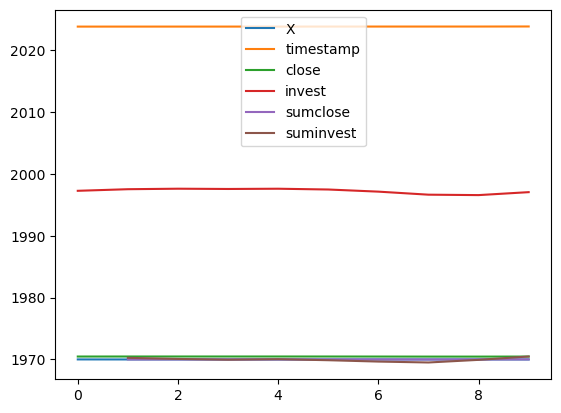

In [94]:
 trades.plot()

In [92]:
X_plot = trades['close'].hvplot.line(    
    x='timestamp', 
    y='close',
    rot=90,
    frame_width=1000,
    frame_height=500,
    ylabel='Decission Making Points', 
    xlabel='timestamp',
    title='Long and Short Signals',
    grid=True,
).opts(
    yformatter='%.0f',
    hover_color="orange",
    gridstyle={'color': 'gray', 'line_width': 1, 'line_style': 'solid'}
)

X_plot

:Curve   [timestamp]   (close)

In [73]:
# Format current date as ISO format
start_time=pd.Timestamp('2023-10-01', tz='America/New_York').isoformat()
end_time=pd.Timestamp('2023-10-31', tz='America/New_York').isoformat()

# Set the tickers
tickers = ["SPY"]

# Set timeframe to "1Minute" for Alpaca API
timeframe = "15Min"

# Get current closing prices for AAPL and SP500
df_spy=alpaca.get_bars(
    tickers,
    timeframe,
    start=start_time,
    end=end_time
).df

df_spy.head()

,close,high,low,trade_count,open,volume,vwap,symbol
timestamp,,,,,,,,
2023-10-02 08:00:00+00:00,429.79,430.18,429.00,187,429.00,27236,429.983665,SPY
2023-10-02 08:15:00+00:00,429.79,429.79,429.52,35,429.66,2639,429.628188,SPY
2023-10-02 08:30:00+00:00,429.95,430.05,429.70,47,429.70,5009,429.922164,SPY
2023-10-02 08:45:00+00:00,429.50,429.93,429.49,58,429.93,3707,429.655217,SPY
2023-10-02 09:00:00+00:00,429.15,429.50,428.92,105,429.42,15309,429.287802,SPY


In [74]:
# Reorganize the DataFrame
# Separate ticker data
df_spy.drop(['high','low','trade_count','open','volume','vwap','symbol'], axis=1, inplace=True)

df_spy.head()

,close
timestamp,
2023-10-02 08:00:00+00:00,429.79
2023-10-02 08:15:00+00:00,429.79
2023-10-02 08:30:00+00:00,429.95
2023-10-02 08:45:00+00:00,429.50
2023-10-02 09:00:00+00:00,429.15


In [75]:
# Returns 
df_spy['return']=df_spy['close'].pct_change()
df_spy.head()


,close,return
timestamp,,
2023-10-02 08:00:00+00:00,429.79,NaN
2023-10-02 08:15:00+00:00,429.79,0.000000
2023-10-02 08:30:00+00:00,429.95,0.000372
2023-10-02 08:45:00+00:00,429.50,-0.001047
2023-10-02 09:00:00+00:00,429.15,-0.000815


In [76]:
# Cumulative returns
df_spy['cumprod']=(1+df_spy['return']).cumprod()
display(df_spy.head)

<bound method NDFrame.head of                             close    return   cumprod
timestamp                                            
2023-10-02 08:00:00+00:00  429.79       NaN       NaN
2023-10-02 08:15:00+00:00  429.79  0.000000  1.000000
2023-10-02 08:30:00+00:00  429.95  0.000372  1.000372
2023-10-02 08:45:00+00:00  429.50 -0.001047  0.999325
2023-10-02 09:00:00+00:00  429.15 -0.000815  0.998511
...                           ...       ...       ...
2023-10-30 22:45:00+00:00  415.32 -0.000169  0.966332
2023-10-30 23:00:00+00:00  415.34  0.000048  0.966379
2023-10-30 23:15:00+00:00  415.29 -0.000120  0.966263
2023-10-30 23:30:00+00:00  415.39  0.000241  0.966495
2023-10-30 23:45:00+00:00  415.18 -0.000506  0.966007

[1344 rows x 3 columns]>

In [77]:

df_spy['invest']=df_spy['cumprod']*fund
display(df_spy)

,close,return,cumprod,invest
timestamp,,,,
2023-10-02 08:00:00+00:00,429.79,NaN,NaN,NaN
2023-10-02 08:15:00+00:00,429.79,0.000000,1.000000,10000.000000
2023-10-02 08:30:00+00:00,429.95,0.000372,1.000372,10003.722748
2023-10-02 08:45:00+00:00,429.50,-0.001047,0.999325,9993.252519
2023-10-02 09:00:00+00:00,429.15,-0.000815,0.998511,9985.109007
...,...,...,...,...
2023-10-30 22:45:00+00:00,415.32,-0.000169,0.966332,9663.323949
2023-10-30 23:00:00+00:00,415.34,0.000048,0.966379,9663.789292
2023-10-30 23:15:00+00:00,415.29,-0.000120,0.966263,9662.625934


In [78]:
spy_plot = df_spy['invest'].hvplot.line(    
    x='timestamp', 
    y='invest',
    rot=90,
    frame_width=1000,
    frame_height=500,
    ylabel='Cumulative Returns', 
    xlabel='timestamp',
    title='SPY Cumulative returns',
    grid=True,
).opts(
    yformatter='%.0f',
    hover_color="orange",
    gridstyle={'color': 'gray', 'line_width': 1, 'line_style': 'solid'}
)

spy_plot

:Curve   [timestamp]   (invest)

In [79]:
spy_profit=df_spy.iloc[-1,-1]
print(f"You made a profit of your SPY investement of $ {spy_profit}")

You made a profit of your SPY investement of $ 9660.066544126206


In [80]:
# AAPL RETURNS IF INVESTED AND DID NOT USE MACD
df_tickers_1 = df_tickers
df_tickers_1


,close,ewm12,ewm26,macd,signal,histogram,return,invest,X
timestamp,,,,,,,,,
2023-10-23 08:00:00+00:00,172.0500,172.050000,172.050000,0.000000,0.000000,0.000000,NaN,10000.000000,NaN
2023-10-23 08:15:00+00:00,171.7500,171.895669,171.898001,-0.002332,-0.001211,-0.001121,-0.001744,9982.563208,0.0
2023-10-23 08:30:00+00:00,171.8600,171.883086,171.884995,-0.001908,-0.001461,-0.000447,0.000640,9988.956699,0.0
2023-10-23 08:45:00+00:00,171.7000,171.833276,171.836880,-0.003604,-0.002060,-0.001544,-0.000931,9979.657076,0.0
2023-10-23 09:00:00+00:00,170.4600,171.526012,171.546629,-0.020617,-0.006364,-0.014253,-0.007222,9907.585004,0.0
...,...,...,...,...,...,...,...,...,...
2023-10-30 22:45:00+00:00,169.8699,169.827982,169.377869,0.450113,0.484036,-0.033923,-0.000177,9873.286835,0.0
2023-10-30 23:00:00+00:00,169.8200,169.827534,169.389501,0.438033,0.480626,-0.042593,-0.000294,9870.386516,0.0
2023-10-30 23:15:00+00:00,169.8500,169.828795,169.401616,0.427179,0.476664,-0.049485,0.000177,9872.130195,0.0


In [81]:
# Reorganize the DataFrame
# Separate ticker data
df_tickers_1.drop(['ewm12','ewm26','macd','signal','histogram','return','invest','X'], axis=1, inplace=True)

df_tickers_1.head()

,close
timestamp,
2023-10-23 08:00:00+00:00,172.05
2023-10-23 08:15:00+00:00,171.75
2023-10-23 08:30:00+00:00,171.86
2023-10-23 08:45:00+00:00,171.70
2023-10-23 09:00:00+00:00,170.46


In [82]:
# Returns 
df_tickers_1['return']=df_tickers_1['close'].pct_change()
df_tickers_1.head()

,close,return
timestamp,,
2023-10-23 08:00:00+00:00,172.05,NaN
2023-10-23 08:15:00+00:00,171.75,-0.001744
2023-10-23 08:30:00+00:00,171.86,0.000640
2023-10-23 08:45:00+00:00,171.70,-0.000931
2023-10-23 09:00:00+00:00,170.46,-0.007222


In [83]:
# Cumulative returns
df_tickers_1['cumprod']=(1+df_tickers_1['return']).cumprod()
display(df_tickers_1.head)

df_tickers_1['invest']=df_tickers_1['cumprod']*fund
display(df_tickers_1)

<bound method NDFrame.head of                               close    return   cumprod
timestamp                                              
2023-10-23 08:00:00+00:00  172.0500       NaN       NaN
2023-10-23 08:15:00+00:00  171.7500 -0.001744  0.998256
2023-10-23 08:30:00+00:00  171.8600  0.000640  0.998896
2023-10-23 08:45:00+00:00  171.7000 -0.000931  0.997966
2023-10-23 09:00:00+00:00  170.4600 -0.007222  0.990759
...                             ...       ...       ...
2023-10-30 22:45:00+00:00  169.8699 -0.000177  0.987329
2023-10-30 23:00:00+00:00  169.8200 -0.000294  0.987039
2023-10-30 23:15:00+00:00  169.8500  0.000177  0.987213
2023-10-30 23:30:00+00:00  169.8199 -0.000177  0.987038
2023-10-30 23:45:00+00:00  169.7000 -0.000706  0.986341

[383 rows x 3 columns]>

,close,return,cumprod,invest
timestamp,,,,
2023-10-23 08:00:00+00:00,172.0500,NaN,NaN,NaN
2023-10-23 08:15:00+00:00,171.7500,-0.001744,0.998256,9982.563208
2023-10-23 08:30:00+00:00,171.8600,0.000640,0.998896,9988.956699
2023-10-23 08:45:00+00:00,171.7000,-0.000931,0.997966,9979.657076
2023-10-23 09:00:00+00:00,170.4600,-0.007222,0.990759,9907.585004
...,...,...,...,...
2023-10-30 22:45:00+00:00,169.8699,-0.000177,0.987329,9873.286835
2023-10-30 23:00:00+00:00,169.8200,-0.000294,0.987039,9870.386516
2023-10-30 23:15:00+00:00,169.8500,0.000177,0.987213,9872.130195


In [84]:
aapl_profit=df_tickers_1.iloc[-1,-1]
print(f"You made a profit of your AAPL investement of $ {aapl_profit}")

You made a profit of your AAPL investement of $ 9863.41179889569


In [ ]:
df_tickers

,close,return,cumprod,invest
timestamp,,,,
2023-10-30 08:00:00+00:00,168.9000,NaN,NaN,NaN
2023-10-30 08:15:00+00:00,168.8500,-0.000296,0.999704,9997.039668
2023-10-30 08:30:00+00:00,168.8500,0.000000,0.999704,9997.039668
2023-10-30 08:45:00+00:00,168.9900,0.000829,1.000533,10005.328597
2023-10-30 09:00:00+00:00,169.2300,0.001420,1.001954,10019.538188
...,...,...,...,...
2023-10-30 22:45:00+00:00,169.8699,-0.000177,1.005742,10057.424512
2023-10-30 23:00:00+00:00,169.8200,-0.000294,1.005447,10054.470101
2023-10-30 23:15:00+00:00,169.8500,0.000177,1.005625,10056.246300


In [86]:
# Calculate MACD
def calculate_macd(df_tickers, short_window, long_window):
  df_tickers['ShortEMA'] = df_tickers['close'].ewm(span=short_window, adjust=False).mean()
  df_tickers['LongEMA'] = df_tickers['close'].ewm(span=long_window, adjust=False).mean()
  df_tickers['MACD'] = df_tickers['ShortEMA'] - df_tickers['LongEMA']
  df_tickers['SignalLine'] = df_tickers['MACD'].ewm(span=9, adjust=False).mean()

# Parameters
short_window = 12
long_window = 26

# Calculate MACD
calculate_macd(df_tickers, short_window, long_window)

# Initialize trading positions
position = None
buy_price = 0
sell_price = 0
signals = []

In [110]:
def macd_order(tickers,short_window=12,long_window=26):
    df_tickers=alpaca.get_bars(
        tickers,
        timeframe,
        start=start_time,
        end=end_time
    ).df
    def calculate_macd(df_tickers = df_tickers, short_window=short_window, long_window=long_window):
        df_tickers['ShortEMA'] = df_tickers['close'].ewm(span=short_window, adjust=False).mean()
        df_tickers['LongEMA'] = df_tickers['close'].ewm(span=long_window, adjust=False).mean()
        df_tickers['MACD'] = df_tickers['ShortEMA'] - df_tickers['LongEMA']
        df_tickers['SignalLine'] = df_tickers['MACD'].ewm(span=9, adjust=False).mean()
        return df_tickers


    data_frame = calculate_macd(df_tickers, short_window, long_window)    
    position = None 
    buy_price = 0
    sell_price = 0
    signals = []
    for i in range(1, len(data_frame)):
        if data_frame['MACD'][i] > data_frame['SignalLine'][i] and data_frame['MACD'][i - 1] <= data_frame['SignalLine'][i - 1]:
            # if position is None:
                position = 'buy'
                buy_price = data_frame['close'][i]
                signals.append((data_frame.index[i], 'Buy', buy_price))
        elif data_frame['MACD'][i] < data_frame['SignalLine'][i] and data_frame['MACD'][i - 1] >= data_frame['SignalLine'][i - 1]:
            # if position == 'buy':
                position = 'sell'
                sell_price = data_frame['close'][i]
                signals.append((data_frame.index[i], 'Sell', sell_price))
    return signals

In [115]:
s= macd_order('NVDA')

In [116]:
for signal in s:
    print(f"Signal Date: {signal[0]}, Action: {signal[1]}, Price: {signal[2]}")

Signal Date: 2023-10-02 08:15:00+00:00, Action: Buy, Price: 439.77
Signal Date: 2023-10-02 11:30:00+00:00, Action: Sell, Price: 439.6
Signal Date: 2023-10-02 13:30:00+00:00, Action: Buy, Price: 445.57
Signal Date: 2023-10-02 17:45:00+00:00, Action: Sell, Price: 447.28
Signal Date: 2023-10-02 20:30:00+00:00, Action: Buy, Price: 448.5
Signal Date: 2023-10-02 23:00:00+00:00, Action: Sell, Price: 448.41
Signal Date: 2023-10-03 08:00:00+00:00, Action: Buy, Price: 451.17
Signal Date: 2023-10-03 09:30:00+00:00, Action: Sell, Price: 449.36
Signal Date: 2023-10-03 20:30:00+00:00, Action: Buy, Price: 435.4
Signal Date: 2023-10-04 17:30:00+00:00, Action: Sell, Price: 436.76
Signal Date: 2023-10-04 19:15:00+00:00, Action: Buy, Price: 439.31
Signal Date: 2023-10-04 22:45:00+00:00, Action: Sell, Price: 439.0
Signal Date: 2023-10-05 08:30:00+00:00, Action: Buy, Price: 440.6
Signal Date: 2023-10-05 08:45:00+00:00, Action: Sell, Price: 439.61
Signal Date: 2023-10-05 10:00:00+00:00, Action: Buy, Price: 

In [90]:
print(signals)

[(Timestamp('2023-10-23 11:30:00+0000', tz='UTC'), 'Buy', 171.32), (Timestamp('2023-10-23 19:00:00+0000', tz='UTC'), 'Sell', 173.44)]
